!pip install seaborn

In [249]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [251]:
tb=pd.read_csv(r"C:\Users\Lucky Prem\Downloads\old projects\archivesales\train.csv")
tb.sample(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8380,FDI19,15.1,low fat,0.000000,Meat,244.2512,OUT045,2002,NaN,Tier 2,Supermarket Type1,3635.2680
5086,FDU07,11.1,Low Fat,0.059836,Fruits and Vegetables,151.3366,OUT035,2004,Small,Tier 2,Supermarket Type1,3022.7320
4743,FDK55,18.5,Low Fat,0.025740,Meat,89.4172,OUT013,1987,High,Tier 3,Supermarket Type1,1605.9096
2995,FDT16,NaN,Regular,0.048427,Frozen Foods,258.7278,OUT027,1985,Medium,Tier 3,Supermarket Type3,5466.8838
5400,DRL37,15.5,Low Fat,0.000000,Soft Drinks,41.3770,OUT017,2007,NaN,Tier 2,Supermarket Type1,649.1550
4238,DRI39,13.8,LF,0.097457,Dairy,55.3930,OUT018,2009,Medium,Tier 3,Supermarket Type2,1018.6740


In [252]:
tb.shape

(8523, 12)

In [253]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [254]:
tb['Item_Weight'].isnull().sum()/tb.shape[0]

0.1716531737651062

In [255]:
tb['Outlet_Size'].isna().sum()/tb.shape[0]
# Outlet_Size have even more

0.2827642848762173

In [256]:
tb.describe() # Outlet_Size is categorical

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [257]:
tb.duplicated().any() #tb[~tb.duplicated()]

False

In [258]:
tb.Item_Identifier.value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [259]:
for i in tb.drop(['Item_Identifier','Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'], axis=1):
    print(i,'=',len(tb[i].unique()),tb[i].unique())
    print()

Item_Fat_Content = 5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type = 16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier = 10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Establishment_Year = 9 [1999 2009 1998 1987 1985 2002 2007 1997 2004]

Outlet_Size = 4 ['Medium' nan 'High' 'Small']

Outlet_Location_Type = 3 ['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type = 4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



# Handling Missing Values

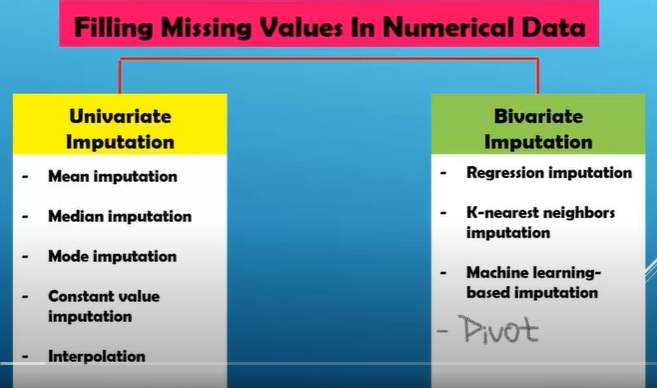

In [260]:
from IPython.display import Image
Image(filename="C:\\Users\\Lucky Prem\\OneDrive\\Desktop\\CS\\Screenshot 2024-02-04 101846.jpg", width=400, height=200)

In [261]:
tb.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [262]:
mn=tb['Item_Weight'].mean()
md=tb['Outlet_Size'].mode()
print(mn, '\n', md)

12.857645184135976 
 0    Medium
Name: Outlet_Size, dtype: object


In [263]:
tb['Item_Weight_mn']= tb['Item_Weight'].fillna(mn)
tb

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [264]:
tb[tb['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.857645
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,12.857645
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,12.857645
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,12.857645
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,12.857645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490,12.857645
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150,12.857645
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120,12.857645
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,12.857645


In [265]:
print('Variance of Orignal Item_Weight is', tb['Item_Weight'].var())
print('Variance Item_Weight after mean imputation', tb['Item_Weight_mn'].var())

Variance of Orignal Item_Weight is 21.56168825983637
Variance Item_Weight after mean imputation 17.860121735060453


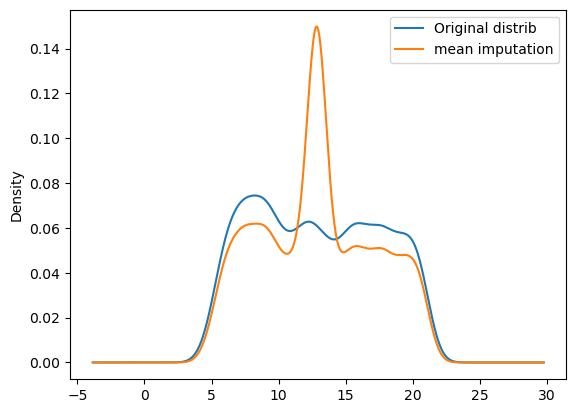

In [266]:
tb['Item_Weight'].plot(kind='kde', label='Original distrib')
tb['Item_Weight_mn'].plot(kind='kde', label='mean imputation')
plt.legend();

<Axes: >

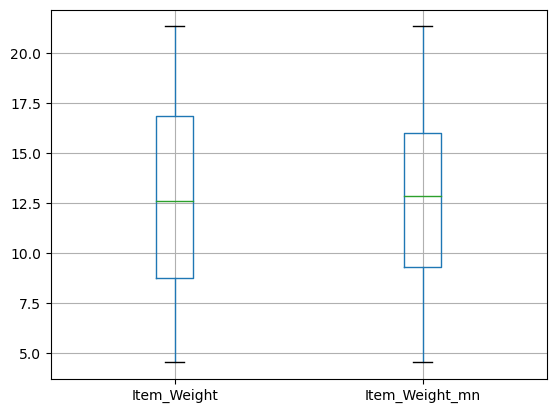

In [267]:
tb[['Item_Weight', 'Item_Weight_mn']].boxplot()

In [268]:
tb['Item_Weight_mn'].median()
#“Item_Weight_mn” dataset is more compact with a smaller IQR and a smaller spread of data.This means that the values in this dataset are more concentrated around the median and have less variation
#Actual “Item_Weight” boxplot is slightly skewed to the right,has a long right tail, meaning that there are more values on the right side of the median than on the left. The “Item_Weight_mn” boxplot is more symmetric, meaning that the values are evenly distributed on both sides of the median

12.857645184135976

Interpolation(method=linear/spline/polynomial) :assumes that the data is continuous and smooth, `and that the missing values are randomly distributed.` It also does not account for the possible correlation or dependency between the variable and other variables or feature

# Interpolation can be useful for data that is continuous and smooth, and that has missing values randomly distributed. However, interpolation may not be suitable for data that is discrete, noisy, or has a complex structure

In [269]:
tb['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

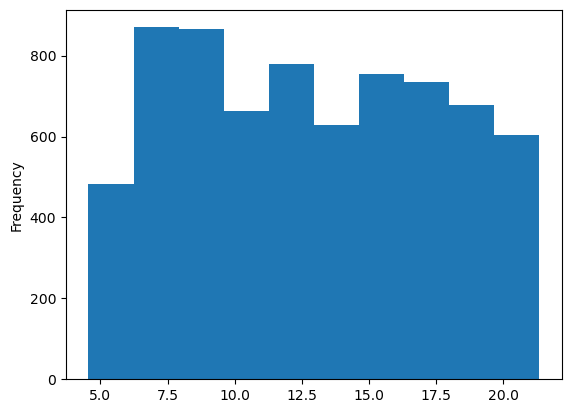

In [270]:
#plt.scatter(x?,y=tb['Item_Weight'])
tb['Item_Weight'].plot.hist(bins=10);

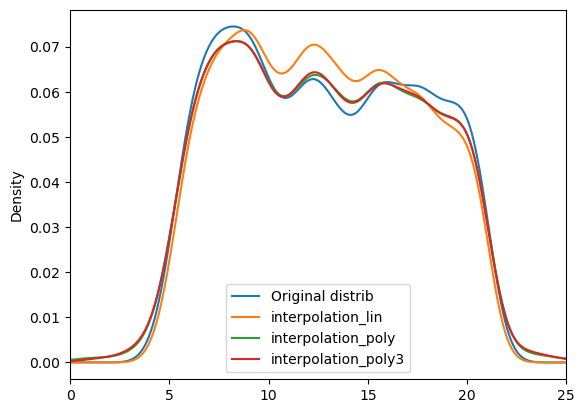

In [271]:
Item_Weight_in1=tb['Item_Weight'].interpolate() #linear default
Item_Weight_in2=tb['Item_Weight'].interpolate(method='quadratic')
Item_Weight_in3=tb['Item_Weight'].interpolate(method='spline', order=3)

tb['Item_Weight'].plot(kind='kde', label='Original distrib')
Item_Weight_in1.plot(kind='kde', label="interpolation_lin")
Item_Weight_in2.plot(kind='kde', label="interpolation_poly")
Item_Weight_in3.plot(kind='kde', label='interpolation_poly3')

plt.legend();
plt.xlim(0,25);

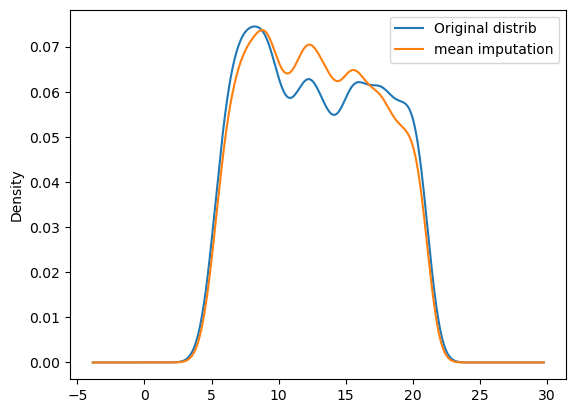

In [272]:
tb['Item_Weight_mn']=Item_Weight_in1
tb['Item_Weight'].plot(kind='kde', label='Original distrib')
tb['Item_Weight_mn'].plot(kind='kde', label='mean imputation')
plt.legend();

In [273]:
tb.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn
6481,FDE22,9.695,Low Fat,0.029693,Snack Foods,159.7920,OUT018,2009,Medium,Tier 3,Supermarket Type2,2716.4640,9.695
5405,NCN05,8.235,Low Fat,0.014489,Health and Hygiene,183.7950,OUT045,2002,NaN,Tier 2,Supermarket Type1,2929.5200,8.235
7565,DRN35,8.010,Low Fat,0.070234,Hard Drinks,34.9532,OUT035,2004,Small,Tier 2,Supermarket Type1,539.2980,8.010
4600,FDE08,NaN,Low Fat,0.049081,Fruits and Vegetables,147.7734,OUT027,1985,Medium,Tier 3,Supermarket Type3,4602.6754,12.090
1252,DRE37,NaN,Low Fat,0.164966,Soft Drinks,189.4872,OUT019,1985,Small,Tier 1,Grocery Store,189.0872,8.780
1334,FDS15,9.195,Regular,0.078182,Meat,106.7596,OUT049,1999,Medium,Tier 1,Supermarket Type1,4098.6648,9.195
4225,FDL13,13.850,Regular,0.094266,Breakfast,233.9300,OUT010,1998,NaN,Tier 3,Grocery Store,233.0300,13.850
4466,FDJ44,12.300,Regular,0.106493,Fruits and Vegetables,176.3396,OUT049,1999,Medium,Tier 1,Supermarket Type1,1395.5168,12.300
1002,FDV46,18.200,Low Fat,0.012659,Snack Foods,140.7180,OUT018,2009,Medium,Tier 3,Supermarket Type2,2656.5420,18.200
2752,NCV06,11.300,Low Fat,0.066669,Household,192.4478,OUT035,2004,Small,Tier 2,Supermarket Type1,2712.4692,11.300


In [274]:
md #=Mode
tb['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

### pivot: instead of imputing md, we are going to fill Outlet_Size based on Outlet_Location_Type; by calculate mode of Outlet_Size as per Outlet_Location_Type 

In [275]:
tb['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [276]:
tb.groupby(['Outlet_Location_Type'])['Outlet_Size'].apply(lambda x: x.mode())

Outlet_Location_Type   
Tier 1                0     Small
Tier 2                0     Small
Tier 3                0    Medium
Name: Outlet_Size, dtype: object

In [277]:
tb.pivot_table(columns='Outlet_Location_Type', values='Outlet_Size', aggfunc=lambda x: x.mode())
#The lambda function takes an input x, which is a subset of values of the Outlet_Size column for each Outlet_Location_Type, and returns the mode of x

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,Small,Small,Medium


In [278]:
tb.groupby(['Outlet_Location_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: count, dtype: int64

In [279]:
tb.pivot_table(columns='Outlet_Location_Type', values='Outlet_Size', aggfunc=lambda x: x.value_counts())
#Small:1458+930, Medium:1863+930 High:932 

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,"[1458, 930]",930,"[1863, 932]"


In [280]:
tb.groupby(['Outlet_Location_Type'])['Outlet_Size'].apply(lambda x: x.mode().iloc[0]).to_dict()

{'Tier 1': 'Small', 'Tier 2': 'Small', 'Tier 3': 'Medium'}

In [281]:
pivot= tb.pivot_table(columns='Outlet_Location_Type', values='Outlet_Size', aggfunc=lambda x: x.mode())
pivot.iloc[0].to_dict()

{'Tier 1': 'Small', 'Tier 2': 'Small', 'Tier 3': 'Medium'}

In [282]:
tb['Outlet_Location_Type'].map(pivot.iloc[0].to_dict())

0        Small
1       Medium
2        Small
3       Medium
4       Medium
         ...  
8518    Medium
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [283]:
tb['Outlet_Size_p']=tb['Outlet_Size'].fillna( tb['Outlet_Location_Type'].map(pivot.iloc[0].to_dict()) )
tb

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn,Outlet_Size_p
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,Medium
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,Medium
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,Medium
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,Medium
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,High
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380,Small
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,Small
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,Medium


In [284]:
tb.drop(['Item_Weight','Outlet_Size'], axis=1, inplace=True)
tb

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn,Outlet_Size_p
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,9.300,Medium
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,5.920,Medium
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,17.500,Medium
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,19.200,Medium
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,8.930,High
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834,6.865,High
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850,8.380,Small
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136,10.600,Small
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976,7.210,Medium


In [285]:
tb.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_mn               0
Outlet_Size_p                0
dtype: int64

# Handling Columns: invalid or incorrect values

In [286]:
tb.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_mn', 'Outlet_Size_p'],
      dtype='object')

In [287]:
for i in tb.drop(['Item_Weight_mn','Outlet_Size_p'], axis=1):
    print(i,'=',len(tb[i].unique()),tb[i].unique())

Item_Identifier = 1559 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content = 5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Visibility = 7880 [0.0160473  0.01927822 0.01676007 ... 0.03518627 0.14522065 0.04487828]
Item_Type = 16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Item_MRP = 5938 [249.8092  48.2692 141.618  ...  57.5904 214.5218  75.467 ]
Outlet_Identifier = 10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year = 9 [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Location_Type = 3 ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type = 4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Item_Outlet_Sales = 3493 [3735.138   443.4228 2097.27   ... 7182.6504 3608.636  2778.3834]


In [288]:
tb.Item_Fat_Content.replace({r'Low Fat|low fat|LF':'low','Regular':'reg'}, regex=True)

0       low
1       reg
2       low
3       reg
4       low
       ... 
8518    low
8519    reg
8520    low
8521    reg
8522    low
Name: Item_Fat_Content, Length: 8523, dtype: object

In [289]:
#tb.Item_Fat_Content.replace({['Low Fat', 'low fat', 'LF']:'low','Regular':'reg'}, inplace=True) #in Pandas, replace() expects dictionary keys to be hashable, which lists aren't. In this case, you can't use a list as a key as lists are not hashable.
tb.Item_Fat_Content.replace({'Low Fat': 'low','low fat': 'low','LF': 'low','Regular': 'reg'}, inplace=True)
tb.Item_Fat_Content.value_counts()

Item_Fat_Content
low    5517
reg    3006
Name: count, dtype: int64

In [290]:
tb.Item_Visibility.value_counts().sort_values()

Item_Visibility
0.152866      1
0.005505      1
0.064625      1
0.071637      1
0.032678      1
           ... 
0.157076      2
0.074613      2
0.187841      2
0.076975      3
0.000000    526
Name: count, Length: 7880, dtype: int64

In [291]:
#a value like 0.000000 might not be a valid or meaningful measure for visibility (it could be an error or a placeholder). Replacing it with np.nan allows you to later identify these entries as missing data, which can then be handled appropriately (for example, by filling them with a more representative value or excluding them from analysis).
tb.Item_Visibility.replace([0.000000],np.nan, inplace=True)

In [292]:
tb.Item_Visibility.value_counts()

Item_Visibility
0.076975    3
0.162462    2
0.076841    2
0.073562    2
0.135708    2
           ..
0.013957    1
0.110460    1
0.124646    1
0.054142    1
0.044878    1
Name: count, Length: 7879, dtype: int64

In [293]:
tb.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn,Outlet_Size_p
0,FDA15,low,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,9.300,Medium
1,DRC01,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,5.920,Medium
2,FDN15,low,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,17.500,Medium
3,FDX07,reg,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,19.200,Medium
4,NCD19,low,NaN,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,8.930,High
5,FDP36,reg,NaN,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088,10.395,Medium
6,FDO10,reg,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528,13.650,High
7,FDP10,low,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636,14.925,Medium
8,FDH17,reg,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986,16.200,Small
9,FDU28,reg,0.094450,Frozen Foods,187.8214,OUT017,2007,Tier 2,Supermarket Type1,4710.5350,19.200,Small


In [294]:
tb.Item_Visibility.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Visibility
Non-Null Count  Dtype  
--------------  -----  
7997 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [296]:
tb.Item_Visibility.ffill()

0       0.016047
1       0.019278
2       0.016760
3       0.016760
4       0.016760
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

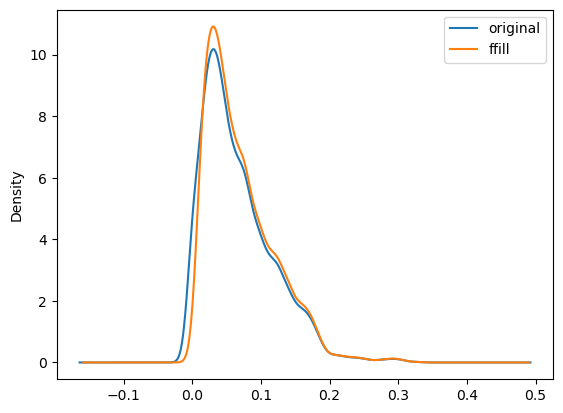

In [297]:
tb1=pd.read_csv(r"C:\Users\Lucky Prem\Downloads\old projects\archivesales\train.csv")
tb1.Item_Visibility.plot(kind='kde', label='original')
tb.Item_Visibility.ffill().plot(kind='kde', label='ffill')
plt.legend();

In [298]:
tb.groupby(['Outlet_Location_Type', 'Item_Fat_Content'])['Item_Visibility'].ffill()
tb.groupby(['Outlet_Location_Type', 'Item_Fat_Content'])['Item_Visibility'].bfill().isna().sum()

0

In [299]:
tb['Item_Visibility'].fillna(tb.groupby(['Outlet_Location_Type', 'Item_Fat_Content'])['Item_Visibility'].bfill(), inplace=True)
tb['Item_Visibility'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Visibility
Non-Null Count  Dtype  
--------------  -----  
8523 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


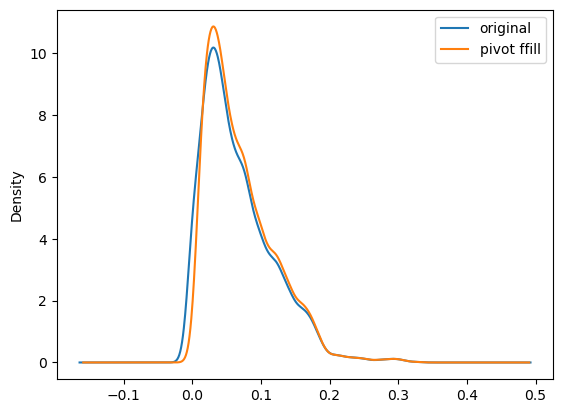

In [301]:
tb1.Item_Visibility.plot(kind='kde', label='original')
tb.Item_Visibility.plot(kind='kde', label='pivot ffill')
plt.legend();

In [302]:
tb.Item_Identifier.value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [303]:
tb.Item_Identifier=tb.Item_Identifier.apply(lambda x: x[:2])
tb.Item_Identifier

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [304]:
tb.Outlet_Establishment_Year.value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [305]:
import datetime as dt
current= dt.datetime.today().year
current

2025

In [306]:
tb['Outlet_Years']=current-tb.Outlet_Establishment_Year
tb['Outlet_Years']

0       26
1       16
2       26
3       27
4       38
        ..
8518    38
8519    23
8520    21
8521    16
8522    28
Name: Outlet_Years, Length: 8523, dtype: int64

In [307]:
tb.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

In [309]:
tb.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

# Feature Eng: Dealing with categorical columns

In [310]:
tb

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn,Outlet_Size_p,Outlet_Years
0,FD,low,0.016047,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1,3735.1380,9.300,Medium,26
1,DR,reg,0.019278,Soft Drinks,48.2692,OUT018,Tier 3,Supermarket Type2,443.4228,5.920,Medium,16
2,FD,low,0.016760,Meat,141.6180,OUT049,Tier 1,Supermarket Type1,2097.2700,17.500,Medium,26
3,FD,reg,0.012741,Fruits and Vegetables,182.0950,OUT010,Tier 3,Grocery Store,732.3800,19.200,Medium,27
4,NC,low,0.127470,Household,53.8614,OUT013,Tier 3,Supermarket Type1,994.7052,8.930,High,38
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,low,0.056783,Snack Foods,214.5218,OUT013,Tier 3,Supermarket Type1,2778.3834,6.865,High,38
8519,FD,reg,0.046982,Baking Goods,108.1570,OUT045,Tier 2,Supermarket Type1,549.2850,8.380,Small,23
8520,NC,low,0.035186,Health and Hygiene,85.1224,OUT035,Tier 2,Supermarket Type1,1193.1136,10.600,Small,21
8521,FD,reg,0.145221,Snack Foods,103.1332,OUT018,Tier 3,Supermarket Type2,1845.5976,7.210,Medium,16


In [54]:
#If a categorical target variable 1D needs to be encoded for a classification predictive modeling problem, then the LabelEncoder class can be used.
#It does the same thing as the OrdinalEncoder(for independent variable 2D), although it expects a one-dimensional input for the single target variable
#For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst. Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results
#In case, a one-hot encoding can be applied to the ordinal/nominal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

In [55]:
!pip install scikit-learn

In [311]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data=tb.copy()

In [318]:
Col= data.select_dtypes(include='object').drop(['Item_Type','Item_Identifier'], axis=1)
print(Col.columns)

Index(['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Size_p'],
      dtype='object')


In [320]:
for i in Col.columns:
    data[i]=oe.fit_transform( data[[i]] )

In [321]:
data

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn,Outlet_Size_p,Outlet_Years
0,FD,0.0,0.016047,Dairy,249.8092,9.0,0.0,1.0,3735.1380,9.300,1.0,26
1,DR,1.0,0.019278,Soft Drinks,48.2692,3.0,2.0,2.0,443.4228,5.920,1.0,16
2,FD,0.0,0.016760,Meat,141.6180,9.0,0.0,1.0,2097.2700,17.500,1.0,26
3,FD,1.0,0.012741,Fruits and Vegetables,182.0950,0.0,2.0,0.0,732.3800,19.200,1.0,27
4,NC,0.0,0.127470,Household,53.8614,1.0,2.0,1.0,994.7052,8.930,0.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,0.0,0.056783,Snack Foods,214.5218,1.0,2.0,1.0,2778.3834,6.865,0.0,38
8519,FD,1.0,0.046982,Baking Goods,108.1570,7.0,1.0,1.0,549.2850,8.380,2.0,23
8520,NC,0.0,0.035186,Health and Hygiene,85.1224,6.0,1.0,1.0,1193.1136,10.600,2.0,21
8521,FD,1.0,0.145221,Snack Foods,103.1332,3.0,2.0,2.0,1845.5976,7.210,1.0,16


In [324]:
#One_hot_encoding
data= pd.get_dummies(data, columns=['Item_Type'], drop_first=True, dtype=int)
data.drop(['Item_Identifier'], axis=1, inplace=True)

In [326]:
pd.set_option('display.max_columns', None)
data

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mn,Outlet_Size_p,Outlet_Years,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.0,0.016047,249.8092,9.0,0.0,1.0,3735.1380,9.300,1.0,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.019278,48.2692,3.0,2.0,2.0,443.4228,5.920,1.0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,0.016760,141.6180,9.0,0.0,1.0,2097.2700,17.500,1.0,26,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,0.012741,182.0950,0.0,2.0,0.0,732.3800,19.200,1.0,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.127470,53.8614,1.0,2.0,1.0,994.7052,8.930,0.0,38,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.056783,214.5218,1.0,2.0,1.0,2778.3834,6.865,0.0,38,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1.0,0.046982,108.1570,7.0,1.0,1.0,549.2850,8.380,2.0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0.0,0.035186,85.1224,6.0,1.0,1.0,1193.1136,10.600,2.0,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,1.0,0.145221,103.1332,3.0,2.0,2.0,1845.5976,7.210,1.0,16,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<Axes: >

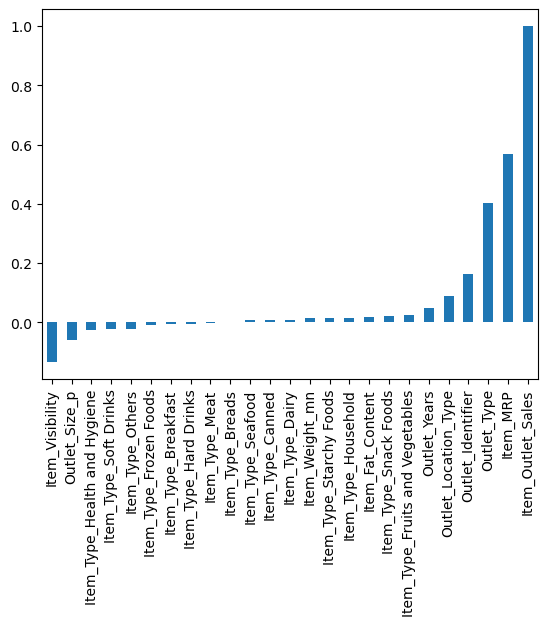

In [327]:
(data.corr()['Item_Outlet_Sales']).sort_values().plot(kind='bar')

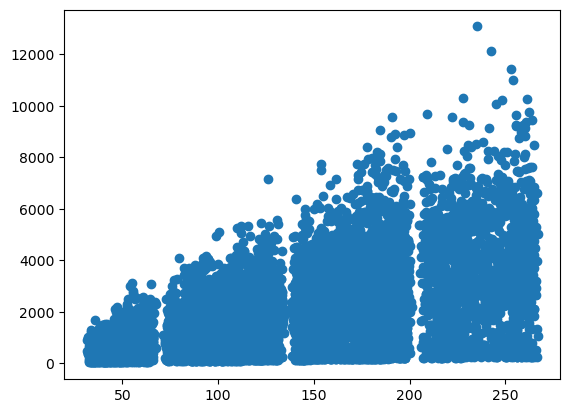

In [328]:
plt.scatter(data.Item_MRP, data.Item_Outlet_Sales)

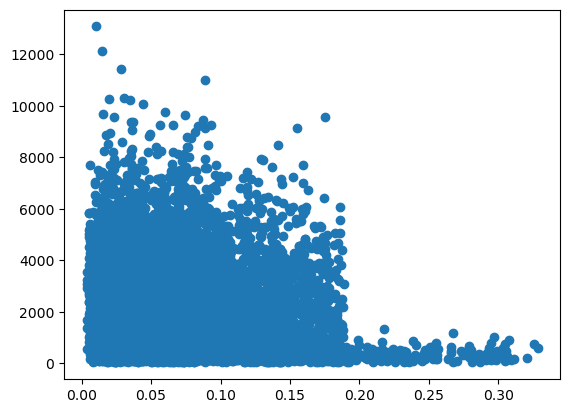

In [329]:
plt.scatter(data.Item_Visibility, data.Item_Outlet_Sales)

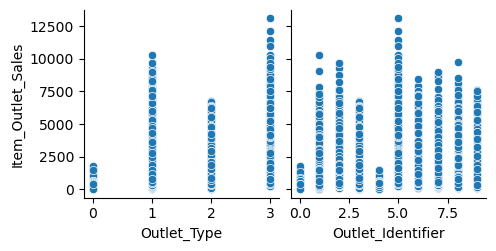

In [331]:
sb.pairplot(data, x_vars=['Outlet_Type','Outlet_Identifier'], y_vars='Item_Outlet_Sales');

# Apply ML models 

In [332]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

In [337]:
X=data.drop(['Item_Outlet_Sales'],axis=1)
y=data.Item_Outlet_Sales

In [338]:
X

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Weight_mn,Outlet_Size_p,Outlet_Years,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.0,0.016047,249.8092,9.0,0.0,1.0,9.300,1.0,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.019278,48.2692,3.0,2.0,2.0,5.920,1.0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,0.016760,141.6180,9.0,0.0,1.0,17.500,1.0,26,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,0.012741,182.0950,0.0,2.0,0.0,19.200,1.0,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.127470,53.8614,1.0,2.0,1.0,8.930,0.0,38,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.056783,214.5218,1.0,2.0,1.0,6.865,0.0,38,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1.0,0.046982,108.1570,7.0,1.0,1.0,8.380,2.0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0.0,0.035186,85.1224,6.0,1.0,1.0,10.600,2.0,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,1.0,0.145221,103.1332,3.0,2.0,2.0,7.210,1.0,16,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [339]:
np.random.seed(0)
for n in [10, 20, 30, 40, 50, 60, 80, 100, 120]:
    model=RandomForestRegressor(n_estimators=n)
    sc=cross_val_score(model, X, y, cv=10)
    print(n, sc, sc.std()) #80 is Best 

10 [0.51028055 0.54480484 0.45840769 0.53749288 0.43474068 0.54091771
 0.53668401 0.54945559 0.58166602 0.50260143] 0.042150431940643614
20 [0.54132792 0.57788788 0.491793   0.56122115 0.44360215 0.57164892
 0.5706584  0.55082121 0.58972756 0.5195412 ] 0.042919580807401346
30 [0.54423321 0.5591059  0.49561765 0.55759977 0.44530332 0.56900701
 0.55248918 0.55285648 0.59842538 0.52229473] 0.04064320155257645
40 [0.56140794 0.57407905 0.49643297 0.56731282 0.45116898 0.5657603
 0.58326963 0.55897476 0.59340323 0.52650686] 0.04179859538481075
50 [0.56021796 0.57886311 0.49298134 0.56589176 0.45560524 0.56805135
 0.56764885 0.55777224 0.59930043 0.5245896 ] 0.04128067488641242
60 [0.55277761 0.57826424 0.48538323 0.56053205 0.45022144 0.56687215
 0.56805043 0.56188067 0.60071814 0.52936693] 0.043112991007270306
80 [0.56003159 0.5750406  0.51057894 0.57109894 0.45272721 0.57785491
 0.57694567 0.56519745 0.60392415 0.53272313] 0.04130355741612804
100 [0.55637063 0.5734448  0.50234451 0.565396

In [340]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [342]:
cross_val_score(lr, X, Y, cv=10)

array([0.50845904, 0.52254296, 0.49064571, 0.51040326, 0.44979514,
       0.50362203, 0.5196531 , 0.4763081 , 0.51547439, 0.48095809])

In [355]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
xtr,xt, ytr,yt=train_test_split(X, y, test_size=0.05)
yt

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
          ...    
7733     467.3916
7868    2542.0244
6837    4165.2448
3975     892.8378
6099     567.2616
Name: Item_Outlet_Sales, Length: 427, dtype: float64

In [347]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pip=make_pipeline(PolynomialFeatures(degree=3), lr)
pip.fit(xtr,ytr)
pip.score(xt,yt)

0.587016319814647

In [348]:
cross_val_score(pip, X, y, cv=10)

array([0.54238419, 0.55072061, 0.49052669, 0.56314203, 0.45393008,
       0.5033388 , 0.57187293, 0.54379298, 0.55116537, 0.54079967])

In [349]:
yhat=pip.predict(xt)

In [350]:
from sklearn.metrics import r2_score
r2_score(yt,yhat)

0.587016319814647

In [352]:
np.random.seed(0)
model=RandomForestRegressor(n_estimators=100)
model.fit(xtr,ytr)
model.score(xt,yt)

0.598732104918736

# so the best result we got using RandomForest Regression, giving us ~60% of accurate predictions